import modules

In [73]:
import rasterio
import numpy as np
from rasterio.windows import Window
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
import matplotlib.colors as mc

open 60m band files and read files 


In [74]:
band2_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B02_60m.jp2').read().astype('float32')
band3_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B03_60m.jp2').read().astype('float32')
band4_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B04_60m.jp2').read().astype('float32')
band8_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B8A_60m.jp2').read().astype('float32')

flatten files 

In [75]:
blue_flat = band2_60.flatten()
green_flat = band3_60.flatten()
red_flat = band4_60.flatten()
NIR = band8_60.flatten()

stack files for visualisation

In [76]:
stacked2 = np.vstack((blue_flat, green_flat)).T
stacked3 = np.vstack((blue_flat, green_flat, red_flat)).T

create random state for clustering

In [77]:
random = random.randint(1,3000000)

KMeans clustering 

In [78]:
clustering = KMeans(n_clusters=4, random_state=random)
cluster1 = clustering.fit_predict(stacked2)
cluster2 = clustering.fit_predict(stacked3)


In [89]:
cluster1.labels

AttributeError: &#39;numpy.ndarray&#39; object has no attribute &#39;labels&#39;

check shape of clusters 

In [79]:
print('shape cluster 1', cluster1.shape)
print('shape cluster 2', cluster2.shape)

shape cluster 1 (3348900,)
shape cluster 2 (3348900,)


In [82]:
plot_array_2 = np.reshape(cluster1, (len(band2_60[0]), len(band2_60[0])))
plot_array_3 = np.reshape(cluster2, (len(band2_60[0]), len(band2_60[0])))
#plot_array_4 = np.reshape(cluster2, (len(band2_60[0]), len(band2_60[0])))


&lt;matplotlib.image.AxesImage at 0x7ff1334a1950&gt;

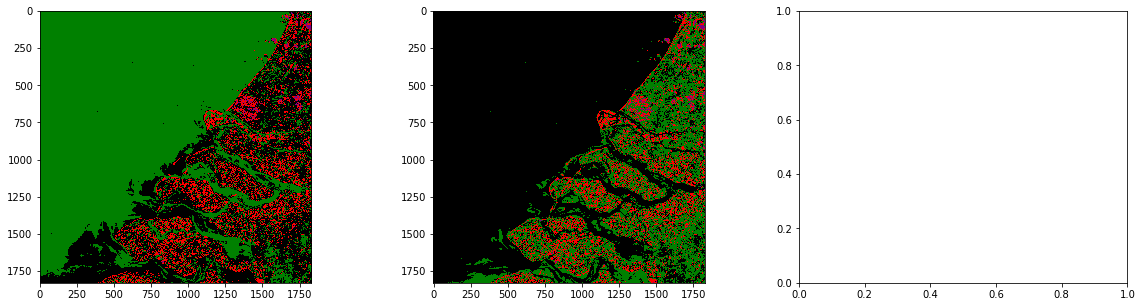

In [86]:
cmap = mc.LinearSegmentedColormap.from_list("", ['black', 'red', 'green', 'purple'])

fig , axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
plt.sca(axes[0])
plt.imshow(plot_array_2, cmap=cmap)

plt.sca(axes[1])
plt.imshow(plot_array_3, cmap=cmap)

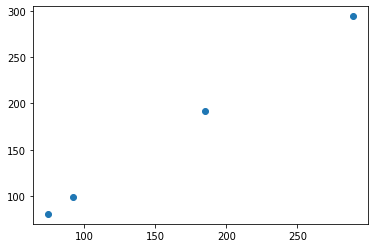

In [13]:
# figuur makes no sense

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.scatter(reshaped_60m[0], reshaped_60m[1])
#plt.show()

plot clusters in 3D 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(stacked2[:,0], stacked2[:,1])
plt.show()

open 10m band files

In [4]:
with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B02_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band2_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B03_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band3_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B04_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band4_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B08_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band8_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

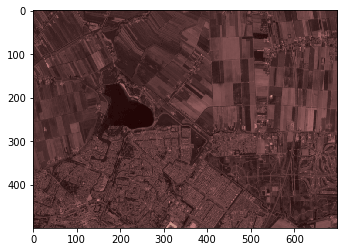

In [10]:
plt.imshow(band8_10, cmap = 'pink')
plt.imshow(band2_10, cmap = 'pink')
plt.imshow(band3_10, cmap = 'pink')
plt.imshow(band4_10, cmap = 'pink')
plt.show()